In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori

In [2]:
df=pd.read_csv('Online retail.csv',header=None)

In [3]:
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [4]:
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [5]:
df.shape

(7501, 1)

In [6]:
df_cleaned = df.dropna(subset=[0]).drop_duplicates()
print(f"Original shape: {df.shape}")
print(f"Shape after dropping NaNs and duplicates: {df_cleaned.shape}")

Original shape: (7501, 1)
Shape after dropping NaNs and duplicates: (5176, 1)


<Axes: xlabel='0'>

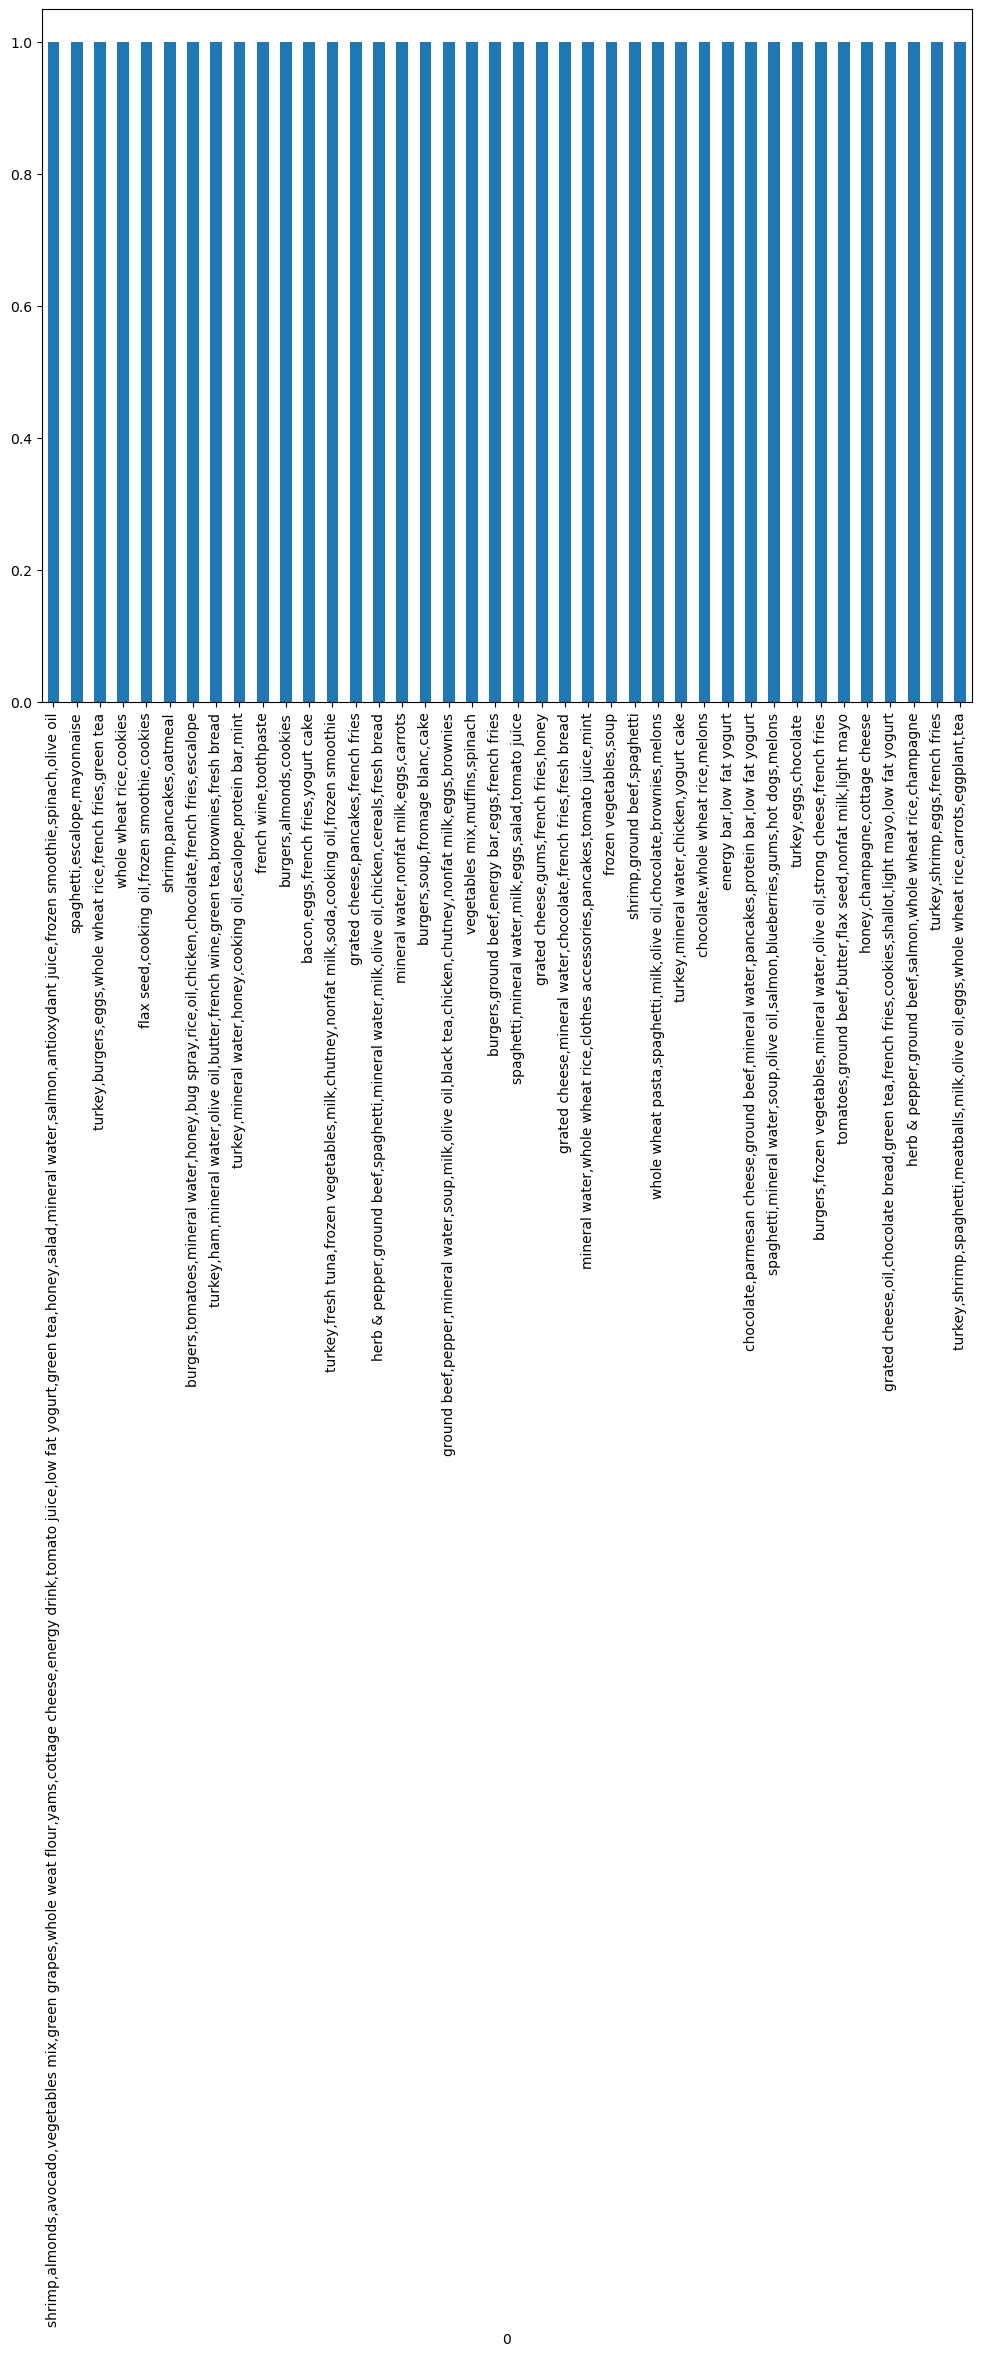

In [7]:
plt.figure(figsize=(12,9))
df_cleaned[0].value_counts().head(40).plot(kind='bar')

In [127]:
transactions = []
for _, row in df_cleaned.iterrows():
    items = [item.strip() for item in str(row[0]).split(',') if item.strip()]
    if items: 
        transactions.append(items)
print(f"\nExtracted {len(transactions)} transactions.")
print("Sample of first 3 extracted transactions:")
for i, t in enumerate(transactions[:3]):
    print(f"Transaction {i+1}: {t}")


Extracted 5176 transactions.
Sample of first 3 extracted transactions:
Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
Transaction 2: ['burgers', 'meatballs', 'eggs']
Transaction 3: ['chutney']


In [92]:
transactions[5000]

['mineral water',
 'meatballs',
 'french wine',
 'green tea',
 'pancakes',
 'light mayo']

In [94]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [96]:
items1=[items for trans in transactions for items in trans]

In [98]:
set(items1)

{'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashed potato',
 'ma

In [100]:
items2=list(set(items1))

In [102]:
print(items2)

['fresh tuna', 'dessert wine', 'salmon', 'corn', 'burger sauce', 'almonds', 'toothpaste', 'grated cheese', 'cake', 'mint', 'light mayo', 'chutney', 'nonfat milk', 'parmesan cheese', 'hot dogs', 'cottage cheese', 'green beans', 'salad', 'tomato juice', 'strawberries', 'avocado', 'french fries', 'bacon', 'vegetables mix', 'champagne', 'gums', 'blueberries', 'oatmeal', 'butter', 'antioxydant juice', 'chocolate', 'cooking oil', 'mayonnaise', 'cereals', 'sparkling water', 'ground beef', 'body spray', 'french wine', 'magazines', 'chili', 'mashed potato', 'soup', 'ketchup', 'honey', 'frozen vegetables', 'spinach', 'fresh bread', 'gluten free bar', 'strong cheese', 'clothes accessories', 'burgers', 'carrots', 'cream', 'bramble', 'shallot', 'ham', 'red wine', 'bug spray', 'whole weat flour', 'meatballs', 'turkey', 'mint green tea', 'pasta', 'pickles', 'yams', 'pepper', 'cider', 'napkins', 'green tea', 'eggs', 'babies food', 'chicken', 'melons', 'soda', 'flax seed', 'low fat yogurt', 'whole whea

In [104]:
len(items2)

119

In [106]:
if 'nan' in items2:
    items2.remove('nan')

In [108]:
len(items2)

119

In [110]:
len(transactions)

5176

In [112]:
trans=TransactionEncoder().fit(transactions)

In [114]:
data=trans.transform(transactions)

In [116]:
data1=pd.DataFrame(data,columns=trans.columns_)

In [118]:
data1

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5172,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
5173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
data1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [122]:
frequent_items=apriori(data1,min_support=0.01,use_colnames=True)
frequent_items

,support,itemsets
0,0.029366,(almonds)
1,0.011206,(antioxydant juice)
2,0.045981,(avocado)
3,0.012558,(bacon)
4,0.015456,(barbecue sauce)
...,...,...
433,0.014683,"(olive oil, spaghetti, mineral water)"
434,0.016615,"(spaghetti, pancakes, mineral water)"
435,0.012365,"(shrimp, spaghetti, mineral water)"
436,0.010819,"(spaghetti, mineral water, soup)"


In [124]:
association_rules(frequent_items,min_threshold=0.01,metric='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(almonds),(mineral water),0.029366,0.299845,0.011012,0.375000,1.250644,1.0,0.002207,1.120247,0.206476,0.034608,0.107340,0.205863
1,(mineral water),(almonds),0.299845,0.029366,0.011012,0.036727,1.250644,1.0,0.002207,1.007641,0.286240,0.034608,0.007583,0.205863
2,(chocolate),(avocado),0.205178,0.045981,0.010240,0.049906,1.085347,1.0,0.000805,1.004131,0.098935,0.042502,0.004114,0.136297
3,(avocado),(chocolate),0.045981,0.205178,0.010240,0.222689,1.085347,1.0,0.000805,1.022528,0.082426,0.042502,0.022032,0.136297
4,(avocado),(french fries),0.045981,0.192620,0.011592,0.252101,1.308800,1.0,0.002735,1.079531,0.247313,0.051064,0.073672,0.156141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,"(spaghetti, mineral water)",(tomatoes),0.085008,0.091963,0.013524,0.159091,1.729947,1.0,0.005706,1.079828,0.461149,0.082742,0.073926,0.153075
956,"(tomatoes, mineral water)",(spaghetti),0.034583,0.229521,0.013524,0.391061,1.703817,1.0,0.005587,1.265282,0.427880,0.053971,0.209663,0.224992
957,(spaghetti),"(tomatoes, mineral water)",0.229521,0.034583,0.013524,0.058923,1.703817,1.0,0.005587,1.025864,0.536137,0.053971,0.025212,0.224992
958,(tomatoes),"(spaghetti, mineral water)",0.091963,0.085008,0.013524,0.147059,1.729947,1.0,0.005706,1.072750,0.464681,0.082742,0.067816,0.153075


In [1]:
print("\n--- Analysis and Interpretation Guidance ---")
print("Analyze the generated rules to identify interesting patterns and relationships between products.")
print("Interpret the results and provide insights into customer purchasing behavior based on the discovered rules.")
print("Key metrics to interpret:")
print("- **Support**: Indicates how frequently an itemset appears in the dataset. A higher support means the itemset is more common.")
print("- **Confidence**: Measures how often items in the consequent (RHS) appear in transactions that also contain the antecedent (LHS). It's the probability of buying the consequent given the antecedent.")
print("- **Lift**: Evaluates the strength of a rule compared to random chance.")
print("  - Lift > 1: Indicates a positive correlation; items are more likely to be bought together than independently.")
print("  - Lift < 1: Indicates a negative correlation; items are less likely to be bought together.")
print("  - Lift = 1: Indicates that the items are independent.")


--- Analysis and Interpretation Guidance ---
Analyze the generated rules to identify interesting patterns and relationships between products.
Interpret the results and provide insights into customer purchasing behavior based on the discovered rules.
Key metrics to interpret:
- **Support**: Indicates how frequently an itemset appears in the dataset. A higher support means the itemset is more common.
- **Confidence**: Measures how often items in the consequent (RHS) appear in transactions that also contain the antecedent (LHS). It's the probability of buying the consequent given the antecedent.
- **Lift**: Evaluates the strength of a rule compared to random chance.
  - Lift > 1: Indicates a positive correlation; items are more likely to be bought together than independently.
  - Lift < 1: Indicates a negative correlation; items are less likely to be bought together.
  - Lift = 1: Indicates that the items are independent.


# Interview Questions:



3.	What are some limitations or challenges of Association rules mining?
        Challenges include scalability with large datasets, generating too many rules (making interpretation difficult), 
dealing with sparse data, and the fact that rules show correlation, not causation. Also, setting appropriate thresholds can be subjective.